<a href="https://colab.research.google.com/github/DineshFoujdar/Machine-Learning-Projects/blob/main/M23MA1006.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Dinesh Chand Foujdar(M23MA1006)

#**Lab Assignment**

**Step 1: Data Preparation**

We will load the Auto MPG dataset, clean it, extract the numerical features.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = sns.load_dataset('mpg')
print(data.head())

#check missing values
data.isna().sum()

# Handle missing values (drop rows with missing values for simplicity)
data = data.dropna(subset=['displacement', 'horsepower', 'weight', 'acceleration', 'mpg'])

# Extract the numerical features
x = data[['displacement', 'horsepower', 'weight', 'acceleration']]
y = data['mpg']

# features summary
print(x.describe())
y.describe()

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  
       displacement  horsepower       weight  acceleration
count    392.000000  392.000000   392.000000    392.000000
mean     194.411990  104.469388  2977.584184     15.541327
std      104.644004   38.491160   849.402560      2.758864
min       68.000000   46.000000  1613.00000

,mpg
count,392.000000
mean,23.445918
std,7.805007
min,9.000000
25%,17.000000
50%,22.750000
75%,29.000000
max,46.600000


**Step 2: Linear Regression Model**

We will implement linear regression from scratch, calculate the coefficients, and evaluate the model using Mean Squared Error (MSE) and R-squared (R²) score.

Implementing Linear Regression (from scratch)
We will solve the equation \theta = (X^T X)^{-1} X^T y, where:

X is the feature matrix (with a column of ones added for the intercept),

y is the target variable (mpg)

θ is the vector of model coefficients.


Coefficients
 [ 4.52511397e+01 -6.00087098e-03 -4.36077309e-02 -5.28050780e-03
 -2.31479993e-02]

Mean Squared Error: 17.80462551900388
R-squared error:  0.7069811865719897


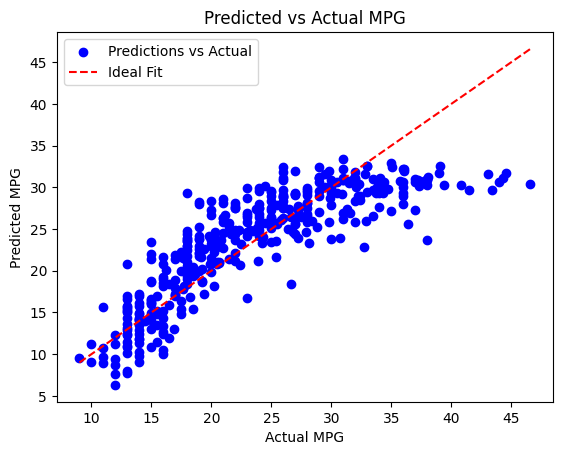

In [2]:
# Add a column of ones for the intercept term
X = np.c_[np.ones(x.shape[0]), x]

# Compute the coefficients (theta)
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print("\nCoefficients\n", theta)

# Predictions
y_pred = X.dot(theta)

# Evaluate the model using Mean Squared Error (MSE)
mse = np.mean((y - y_pred) ** 2)
print(f"\nMean Squared Error: {mse}")

ss_tot = sum((yt - np.mean(y)) ** 2 for yt in y)
ss_res = 0
for i in range(len(y)):
  ss_res += (y.iloc[i] - y_pred[i])**2

# R-squared error
r_sq = 1 - (ss_res / ss_tot)
print("R-squared error: ",r_sq)

# Plotting the predicted vs actual values
plt.scatter(y, y_pred, color='blue', label='Predictions vs Actual')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Predicted vs Actual MPG')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='Ideal Fit')
plt.legend()
plt.show()


###Naive Bayes Model with Categorical Features :

Predicted categories: ['low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'high', 'medium', 'medium', 'medium', 'high', 'high', 'medium', 'high', 'high', 'medium', 'medium', 'low', 'low', 'low', 'low', 'high', 'medium', 'high', 'medium', 'low', 'medium', 'medium', 'medium', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'medium', 'medium', 'medium', 'medium', 'high', 'high', 'high', 'high', 'high', 'high', 'medium', 'high', 'medium', 'high', 'medium', 'medium', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'high', 'low', 'low', 'low', 'low', 'medium', 'medium', 'medium', 'high', 'medium', 'high', 'medium', 'medium', 'high', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'medium', 'medium', 'medium', 'medium', 'high', 'low', 'low', 'low', 'low', 'medium', 'high', 'medium', 'high', 'high', 'medium', 'medium', 'high', 'low', 'low', 'high', 'high', 'medium', 'medium', 'low',

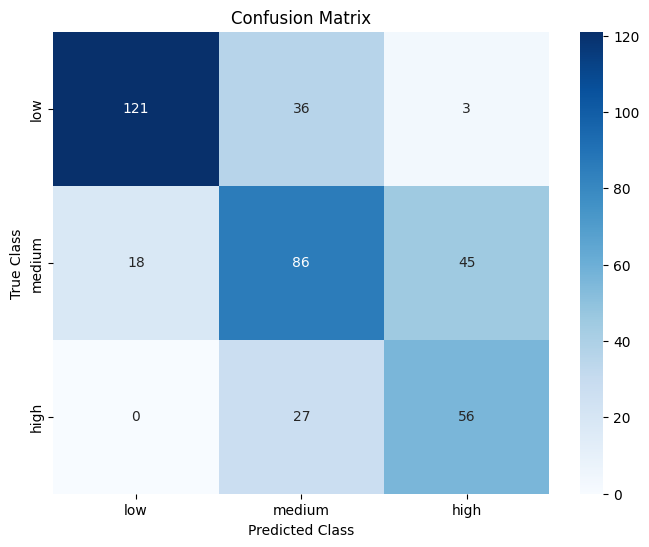

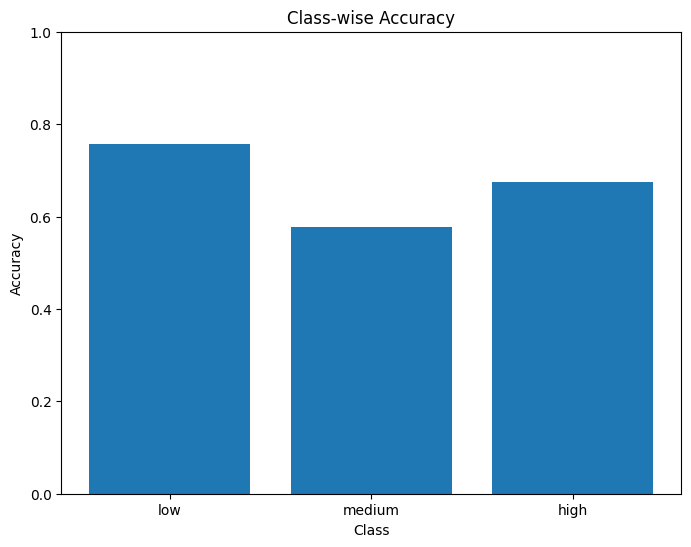

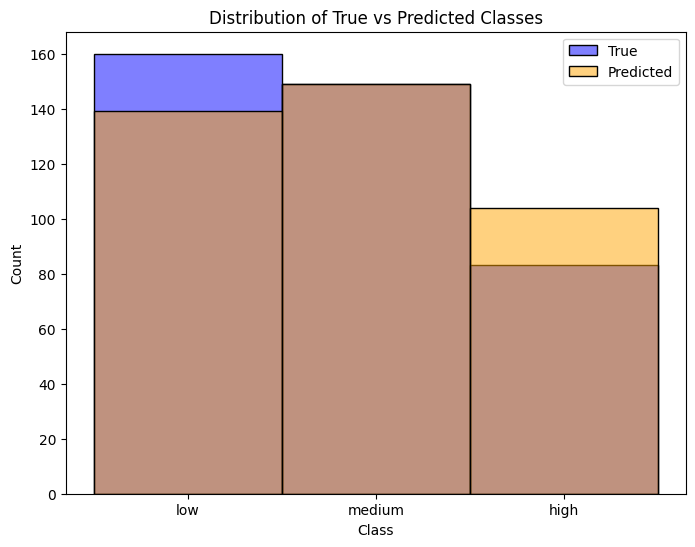

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
data = sns.load_dataset('mpg')

# Handle missing values (drop rows with missing values)
data = data.dropna(subset=['displacement', 'horsepower', 'weight', 'mpg'])

# Binning the numerical features into categories
data['displacement_cat'] = pd.cut(data['displacement'], bins=[0, 150, 300, float('inf')], labels=['small', 'medium', 'large'])
data['horsepower_cat'] = pd.cut(data['horsepower'], bins=[0, 100, 200, float('inf')], labels=['low', 'medium', 'high'])
data['weight_cat'] = pd.cut(data['weight'], bins=[0, 2500, 3500, float('inf')], labels=['light', 'medium', 'heavy'])
data['mpg_cat'] = pd.cut(data['mpg'], bins=[0, 20, 30, float('inf')], labels=['low', 'medium', 'high'])

# Extract the features and the target
x = data[['origin', 'displacement_cat', 'horsepower_cat', 'weight_cat']]
y = data['mpg_cat']

# Calculate priors (the probability of each mpg category)
priors = y.value_counts(normalize=True).to_dict()

# Calculate conditional probabilities given 'low' mpg
prob_given_low = {}
x_filtered = x[y == 'low']
for col in x.columns:
    prob_given_low[col] = x_filtered[col].value_counts(normalize=True).to_dict()

# Calculate conditional probabilities given 'medium' mpg
prob_given_medium = {}
x_filtered = x[y == 'medium']
for col in x.columns:
    prob_given_medium[col] = x_filtered[col].value_counts(normalize=True).to_dict()

# Calculate conditional probabilities given 'high' mpg
prob_given_high = {}
x_filtered = x[y == 'high']
for col in x.columns:
    prob_given_high[col] = x_filtered[col].value_counts(normalize=True).to_dict()

# Predicting the mpg category for each row
y_new = ['low'] * len(x)
for row in range(len(x)):
    # Start with prior probabilities
    a = priors['low']
    b = priors['medium']
    c = priors['high']

    # Multiply by the conditional probabilities for each feature
    for col in ['origin', 'displacement_cat', 'horsepower_cat', 'weight_cat']:
        a = a * prob_given_low[col].get(x[col].iloc[row], 1e-6)  # Adding small value to avoid zero probability
        b = b * prob_given_medium[col].get(x[col].iloc[row], 1e-6)
        c = c * prob_given_high[col].get(x[col].iloc[row], 1e-6)

    # Assign the label with the highest posterior probability
    if a >= b and a >= c:
        y_new[row] = 'low'
    elif b >= a and b >= c:
        y_new[row] = 'medium'
    else:
        y_new[row] = 'high'

# Now `y_new` contains the predicted mpg categories
print("Predicted categories:", y_new)

# Confusion matrix
def confusion_matrix(y_true, y_pred, classes):
    matrix = np.zeros((len(classes), len(classes)), dtype=int)
    class_to_idx = {label: idx for idx, label in enumerate(classes)}
    for true_label, pred_label in zip(y_true, y_pred):
        true_idx = class_to_idx[true_label]
        pred_idx = class_to_idx[pred_label]
        matrix[true_idx][pred_idx] += 1
    return matrix

# Actual vs predicted labels for comparison
y_actual = y.values
y_predicted = y_new

# Classes in the target
classes = ['low', 'medium', 'high']

# Generate confusion matrix
conf_matrix = confusion_matrix(y_actual, y_predicted, classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

# Plot class-wise accuracy
class_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)
plt.figure(figsize=(8, 6))
plt.bar(classes, class_accuracy)
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Class-wise Accuracy')
plt.ylim(0, 1)
plt.show()

# Plot distribution of true vs predicted classes
plt.figure(figsize=(8, 6))
sns.histplot(y_actual, color="blue", label="True", alpha=0.5, kde=False)
sns.histplot(y_predicted, color="orange", label="Predicted", alpha=0.5, kde=False)
plt.legend()
plt.xlabel('Class')
plt.title('Distribution of True vs Predicted Classes')
plt.show()

##Hybrid Model:

In [16]:
# Convert categorical predictions to numeric values for Linear Regression
y_new_numeric = pd.Series(pd.Categorical(y_new, categories=['low', 'medium', 'high']).codes)

data['naive_bayes'] = y_new_numeric

# Extract numerical features and target for Linear Regression
x = data[['displacement', 'horsepower', 'weight', 'acceleration', 'naive_bayes' ]]
y = data['mpg']

# Ensure there are no NaN or infinite values in the combined features
x = x.replace([np.inf, -np.inf], np.nan).dropna()
y = y[x.index]

X = np.c_[np.ones(x.shape[0]), x]

# Compute the coefficients (theta)
theta_hybrid = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print("\nHybrid Model Coefficients\n", theta_hybrid)

# Predictions for the hybrid model
y_pred_hybrid = X.dot(theta_hybrid)

#  Mean Squared Error (MSE)
mse_hybrid = np.mean((y - y_pred_hybrid) ** 2)
print(f"\nHybrid Model Mean Squared Error: {mse_hybrid}")

# R-squared error
ss_tot_hybrid = np.sum((y - np.mean(y)) ** 2)
ss_res_hybrid = np.sum((y - y_pred_hybrid) ** 2)
r_sq_hybrid = 1 - (ss_res_hybrid / ss_tot_hybrid)
print("Hybrid Model R-squared error: ", r_sq_hybrid)

# Comparison with the original model

# Extract features for the original model (without Naive Bayes)
x_orig = data[['displacement', 'horsepower', 'weight', 'acceleration']]

# Ensure there are no NaN or infinite values
x_orig = x_orig.replace([np.inf, -np.inf], np.nan).dropna()
y = data['mpg']
y = y[x_orig.index]

X_orig = np.c_[np.ones(x_orig.shape[0]), x_orig]

# Compute the coefficients (theta)
theta_orig = np.linalg.inv(X_orig.T.dot(X_orig)).dot(X_orig.T).dot(y)
print("\nOriginal Model Coefficients\n", theta_orig)

# Predictions
y_pred_orig = X_orig.dot(theta_orig)

#  Mean Squared Error (MSE)
mse_orig = np.mean((y - y_pred_orig) ** 2)
print(f"\nOriginal Model Mean Squared Error: {mse_orig}")

# R-squared error
ss_res_orig = np.sum((y - y_pred_orig) ** 2)
r_sq_orig = 1 - (ss_res_orig / ss_tot_hybrid)
print("Original Model R-squared error: ", r_sq_orig)


Hybrid Model Coefficients
 [ 4.54829453e+01 -6.21090268e-03 -4.81419775e-02 -4.91705692e-03
 -1.04536445e-01  4.32484473e-01]

Hybrid Model Mean Squared Error: 17.38734724731486
Hybrid Model R-squared error:  0.7108878983239374

Original Model Coefficients
 [ 4.52511397e+01 -6.00087098e-03 -4.36077309e-02 -5.28050780e-03
 -2.31479993e-02]

Original Model Mean Squared Error: 17.80462551900388
Original Model R-squared error:  0.6993476871020716
